In [1]:
import pandas as pd
cols = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/var_names.csv")
data = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/CSCS_data_anon.csv",
                   na_values=["9999", "", " ", "Presented but no response", "NA"])
empty = (data.isna().sum()==data.shape[0])
data = data[empty.index[~empty]] # keep non empty columns only

data.shape
# This variable indicates the dataset that the observation belongs to
data.DATASET.value_counts()
# This variable indicates the year the observation was recruited
data.SURVEY_collection_year.value_counts()
# This variable indicates whether the observation was part of the cohort survey or the cross-sectional survey 
data.SURVEY_collection_type.value_counts()
# This variable indicates whether the observation is from a cohort participant
data.SURVEY_cohort_participant.value_counts()
# This variable indicates the number of observations the participant has
data.SURVEY_num_responses.value_counts()
# This variable indicates the unique ID of the participant
data.SURVEY_random_id.notna().value_counts() # few have IDs
# This variable indicates cases we recommend removing from an analysis due to fast completion times or possible fraudulent responses.
data.REMOVE_case.value_counts()
# Let's just keep the recommended data
dataV2 = data[data.REMOVE_case=='No'].copy()
dataV2.shape
# And select out participants who are part of the cohort data 
# (but may also be a part of the cross-sectional data)
dataV2_cohort = dataV2[dataV2.SURVEY_cohort_participant].copy()
dataV2_cohort.shape
# And remove year 2023 for which there's not yet much data collected
dataV2_cohortV2 = dataV2_cohort[dataV2_cohort.SURVEY_collection_year!=2023].copy()
dataV2_cohortV2.shape
# And remove columns that have less than some number of missing values
# We could consider no missing values using 850, or...?
missingness_limit = 100 # this retains 166 of 1024 columns that aren't fully empty
columns2keep = dataV2_cohortV2.isna().sum() < missingness_limit
columns2keep = columns2keep.index[columns2keep]
dataV2_cohortV3 = dataV2_cohortV2[columns2keep].copy()
dataV2_cohortV3.shape
# The data itself then looks like this
pd.set_option('display.max_columns', dataV2_cohortV3.shape[1]) # Can cause jupyter notebooks to crash
# DO NOT USE in conjuection with pd.set_option('display.max_rows', 1000) 
dataV2_cohortV3


/tmp/ipykernel_145/2035209741.py:3: DtypeWarning: Columns (129,408,630,671,689,978,1001,1002,1006,1007,1008,1080,1113,1115,1116,1117,1118,1119,1120,1121,1124,1125,1126,1127,1128,1213,1214,1215,1216,1217,1218,1263,1266,1342,1343,1344,1345,1346,1347,1348,1349,1390,1391,1393,1439,1442,1463,1546,1549,1552,1555,1558,1561) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/main/CP/CSCS_data_anon.csv",


,UNIQUE_id,UNIQUE_num_records,ELIGIBLE_consent,COVID_prevention_distancing,COVID_prevention_masks,COVID_prevention_hand_washing,COVID_prevention_reduce_people,COVID_prevention_avoid_trips,COVID_prevention_household,COVID_vaccinated,WELLNESS_life_satisfaction,WELLNESS_malach_pines_burnout_measure_tired,WELLNESS_malach_pines_burnout_measure_disappointed,WELLNESS_malach_pines_burnout_measure_hopeless,WELLNESS_malach_pines_burnout_measure_trapped,WELLNESS_malach_pines_burnout_measure_helpless,WELLNESS_malach_pines_burnout_measure_depressed,WELLNESS_malach_pines_burnout_measure_sick,WELLNESS_malach_pines_burnout_measure_worthless,WELLNESS_malach_pines_burnout_measure_difficulty_sleeping,WELLNESS_malach_pines_burnout_measure_had_it,CONNECTION_activities_talked_day_p3m,CONNECTION_activities_talked_family_p3m,CONNECTION_activities_talked_job_p3m,CONNECTION_activities_talked_hobbies_p3m,CONNECTION_activities_phone_p3m,CONNECTION_activities_letter_or_email_p3m,CONNECTION_activities_checked_in_p3m,CONNECTION_activities_text_or_messaged_p3m,CONNECTION_activities_chat_p3m,CONNECTION_activities_video_chat_p3m,CONNECTION_activities_group_video_chat_p3m,CONNECTION_activities_walk_p3m,CONNECTION_activities_coffee_p3m,CONNECTION_activities_board_games_p3m,CONNECTION_activities_computer_games_p3m,CONNECTION_activities_onlinegames_p3m,CONNECTION_activities_visited_friends_p3m,CONNECTION_activities_visited_family_p3m,CONNECTION_activities_community_p3m,CONNECTION_activities_helped_p3m,CONNECTION_activities_meeting_work_p3m,CONNECTION_activities_discussion_group_p3m,CONNECTION_activities_group_exercise_p3m,CONNECTION_activities_church_p3m,CONNECTION_activities_new_friend_p3m,CONNECTION_activities_hug_p3m,CONNECTION_activities_kissed_p3m,CONNECTION_activities_sex_p3m,LONELY_ucla_loneliness_scale_companionship,LONELY_ucla_loneliness_scale_left_out,LONELY_ucla_loneliness_scale_isolated,CONNECTION_social_num_close_friends_grouped,CONNECTION_social_days_family_p7d_grouped,CONNECTION_social_days_friends_p7d_grouped,CONNECTION_social_days_coworkers_and_classmates_p7d_grouped,CONNECTION_social_days_neighbours_p7d_grouped,CONNECTION_social_time_family_p7d_grouped,CONNECTION_social_time_friends_p7d_grouped,CONNECTION_social_time_coworkers_and_classmates_p7d_grouped,CONNECTION_social_time_neighbours_p7d_grouped,CONNECTION_social_num_family_p7d_grouped,CONNECTION_social_num_friends_p7d_grouped,CONNECTION_social_num_coworkers_and_classmates_p7d_grouped,CONNECTION_social_num_neighbours_p7d_grouped,CONNECTION_preference_time_family_grouped,CONNECTION_preference_time_friends_grouped,CONNECTION_preference_time_coworkers_classmates_grouped,CONNECTION_preference_time_neighbours_grouped,LONELY_dejong_emotional_social_loneliness_scale_emptiness,LONELY_dejong_emotional_social_loneliness_scale_rely,LONELY_dejong_emotional_social_loneliness_scale_trust,LONELY_dejong_emotional_social_loneliness_scale_close,LONELY_dejong_emotional_social_loneliness_scale_miss,LONELY_dejong_emotional_social_loneliness_scale_rejected,LONELY_direct,LONELY_change_pre_covid,LONELY_others_aware,PSYCH_zimet_multidimensional_social_support_scale_need,PSYCH_zimet_multidimensional_social_support_scale_joys,PSYCH_zimet_multidimensional_social_support_scale_positive_not_scored,PSYCH_zimet_multidimensional_social_support_scale_gets_me_not_scored,PSYCH_zimet_multidimensional_social_support_scale_family_helps,PSYCH_zimet_multidimensional_social_support_scale_family_emotional,PSYCH_zimet_multidimensional_social_support_scale_comfort,PSYCH_zimet_multidimensional_social_support_scale_help,PSYCH_zimet_multidimensional_social_support_scale_go_wrong,PSYCH_zimet_multidimensional_social_support_scale_problems_family,PSYCH_zimet_multidimensional_social_support_scale_problems_friends,PSYCH_zimet_multidimensional_social_support_scale_sorrows,PSYCH_zimet_multidimensional_social_support_scale_feelings,PSYCH_zimet_multidimensional_social_support_scale_decisions,WELLNESS_self_rated_physical_health,WELLNESS_self_rated_me

In [2]:
# Here's a high level summary of the data
for col in dataV2_cohortV3.columns:
    col_summary = dataV2_cohortV3[col].value_counts(dropna=False)
    if len(col_summary)<11:
        print(col_summary, "\n")
    else:
        print(col, dataV2_cohortV3[col].shape, "\n")

UNIQUE_id (850,) 

UNIQUE_num_records
3    628
2    199
4     23
Name: count, dtype: int64 

ELIGIBLE_consent
Yes    850
Name: count, dtype: int64 

COVID_prevention_distancing
Very closely        431
Somewhat closely    303
Not at all           75
NaN                  41
Name: count, dtype: int64 

COVID_prevention_masks
Very closely        576
Somewhat closely    142
Not at all           90
NaN                  42
Name: count, dtype: int64 

COVID_prevention_hand_washing
Very closely        581
Somewhat closely    189
NaN                  41
Not at all           39
Name: count, dtype: int64 

COVID_prevention_reduce_people
Very closely        504
Somewhat closely    205
Not at all           96
NaN                  45
Name: count, dtype: int64 

COVID_prevention_avoid_trips
Very closely        410
Somewhat closely    247
Not at all          151
NaN                  42
Name: count, dtype: int64 

COVID_prevention_household
Very closely        387
Somewhat closely    260
Not at all     

In [3]:
# And here are some explanations about the columns in the data
cols_dataV2_cohortV3 = cols.new_var.apply(lambda x: x in dataV2_cohortV3.columns)
cols_dataV2_cohortV3 = cols[cols_dataV2_cohortV3].iloc[:,-2:].drop_duplicates()
for i,row in cols_dataV2_cohortV3.sort_values('new_var').iterrows():
    print("\033[1m\033[4m",row.new_var, "\033[0m", sep="", end=": ")
    print(row.text, end="\n\n")

CONNECTION_activities_board_games_p3m: In the PAST THREE MONTH, how often have you... - played a board game with others?

CONNECTION_activities_chat_p3m: In the PAST THREE MONTH, how often have you... - had an extended conversation via text or a messaging app?

CONNECTION_activities_chat_p3m: In the PAST THREE MONTH, how often have you... - had an in-person, face-to-face conversation with someone?

CONNECTION_activities_checked_in_p3m: In the PAST THREE MONTH, how often have you... - sent a text/private message to someone just to check in?

CONNECTION_activities_church_p3m: In the PAST THREE MONTH, how often have you... - attended church, synagogue, temple, etc.?

CONNECTION_activities_coffee_p3m: In the PAST THREE MONTH, how often have you... - met someone for a meal, drink, dessert, or cup of coffee?

CONNECTION_activities_community_p3m: In the PAST THREE MONTH, how often have you... - volunteered in the community?

CONNECTION_activities_computer_games_p3m: In the PAST THREE MONTH, h

---

---

In [4]:
dataV2_cohortV4 = dataV2_cohortV3[dataV2_cohortV3.Secs_per_q<30].copy()
dataV2_cohortV4.loc[:, 'SURVEY_YEAR'] = (dataV2_cohortV4.SURVEY_collection_type+" "+dataV2_cohortV4.SURVEY_collection_year.astype(str)).values
# dataV2_cohortV4.SURVEY_YEAR.value_counts()
# SURVEY_YEAR
# cohort 2022    446
# cross 2021     368

# we'll focus on some of the numeric outcomes in the data set... including Secs_per_q
dataV2_cohortV4_wide = \
dataV2_cohortV4.melt(id_vars=['UNIQUE_id','SURVEY_YEAR'], 
                     value_vars=['Secs_per_q',
                                'LONELY_ucla_loneliness_scale_score',
                                'WELLNESS_life_satisfaction', 
                                'WELLNESS_malach_pines_burnout_measure_score',
                                'LONELY_dejong_emotional_social_loneliness_scale_score',
                                'LONELY_dejong_emotional_loneliness_sub_scale_score',
                                'LONELY_dejong_social_loneliness_sub_scale_score',
                                'PSYCH_zimet_multidimensional_social_support_scale_score',
                                'PSYCH_zimet_multidimensional_social_support_family_subscale_score',
                                'PSYCH_zimet_multidimensional_social_support_significant_other_subscale_score',
                                'PSYCH_zimet_multidimensional_social_support_friends_subscale_score',
                                'WELLNESS_subjective_happiness_scale_score',
                                'WELLNESS_phq_score', 'WELLNESS_gad_score'])
# and we'll put these in columns for "cross 2021" and "cohort 2022"
dataV2_cohortV4_wide['variable'] = dataV2_cohortV4_wide['variable'] + " ("+dataV2_cohortV4_wide['SURVEY_YEAR']+")" 
# on the basis of UNIQUE_id which links individuals across studies
dataV2_cohortV4_wide = dataV2_cohortV4_wide.pivot(index='UNIQUE_id', columns='variable', values='value')
# and consider fully observed data only
dataV2_cohortV4_wideV2 = dataV2_cohortV4_wide.dropna() 
dataV2_cohortV4_wideV2

variable,LONELY_dejong_emotional_loneliness_sub_scale_score (cohort 2022),LONELY_dejong_emotional_loneliness_sub_scale_score (cross 2021),LONELY_dejong_emotional_social_loneliness_scale_score (cohort 2022),LONELY_dejong_emotional_social_loneliness_scale_score (cross 2021),LONELY_dejong_social_loneliness_sub_scale_score (cohort 2022),LONELY_dejong_social_loneliness_sub_scale_score (cross 2021),LONELY_ucla_loneliness_scale_score (cohort 2022),LONELY_ucla_loneliness_scale_score (cross 2021),PSYCH_zimet_multidimensional_social_support_family_subscale_score (cohort 2022),PSYCH_zimet_multidimensional_social_support_family_subscale_score (cross 2021),PSYCH_zimet_multidimensional_social_support_friends_subscale_score (cohort 2022),PSYCH_zimet_multidimensional_social_support_friends_subscale_score (cross 2021),PSYCH_zimet_multidimensional_social_support_scale_score (cohort 2022),PSYCH_zimet_multidimensional_social_support_scale_score (cross 2021),PSYCH_zimet_multidimensional_social_support_significant_other_subscale_score (cohort 2022),PSYCH_zimet_multidimensional_social_support_significant_other_subscale_score (cross 2021),Secs_per_q (cohort 2022),Secs_per_q (cross 2021),WELLNESS_gad_score (cohort 2022),WELLNESS_gad_score (cross 2021),WELLNESS_life_satisfaction (cohort 2022),WELLNESS_life_satisfaction (cross 2021),WELLNESS_malach_pines_burnout_measure_score (cohort 2022),WELLNESS_malach_pines_burnout_measure_score (cross 2021),WELLNESS_phq_score (cohort 2022),WELLNESS_phq_score (cross 2021),WELLNESS_subjective_happiness_scale_score (cohort 2022),WELLNESS_subjective_happiness_scale_score (cross 2021)
UNIQUE_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
cscs_00021,2.0,1.0,2.0,1.0,0.0,0.0,5.0,6.0,6.50,5.75,6.75,5.25,6.750000,6.000000,7.00,7.00,6.017964,6.018939,0.0,0.0,2.0,4.0,2.4,2.6,1.0,1.0,5.25,5.00
cscs_00080,1.0,1.0,2.0,1.0,1.0,0.0,6.0,6.0,4.00,4.50,5.00,5.25,4.916667,5.333333,5.75,6.25,7.452381,14.885794,0.0,1.0,8.0,9.0,3.2,2.4,0.0,0.0,6.00,6.00
cscs_00081,3.0,3.0,6.0,6.0,3.0,3.0,9.0,9.0,4.50,3.50,4.25,2.25,4.750000,3.750000,5.50,5.50,4.377483,5.128920,4.0,4.0,8.0,2.0,3.1,4.9,4.0,3.0,4.50,2.75
cscs_00114,1.0,1.0,3.0,3.0,2.0,2.0,8.0,6.0,6.00,5.75,5.75,5.50,5.583333,5.416667,5.00,5.00,3.690476,4.485294,0.0,6.0,5.0,6.0,4.6,3.7,2.0,0.0,4.50,4.25
cscs_00204,3.0,3.0,6.0,6.0,3.0,3.0,8.0,9.0,1.25,4.50,6.25,7.00,3.916667,5.666667,4.25,5.50,4.954248,4.451493,4.0,3.0,6.0,2.0,4.8,3.6,3.0,4.0,3.00,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cscs_11699,1.0,0.0,2.0,2.0,1.0,2.0,3.0,3.0,5.50,5.50,5.75,6.25,6.083333,6.250000,7.00,7.00,7.969512,5.714674,0.0,0.0,10.0,3.0,2.9,3.5,1.0,0.0,5.25,6.00
cscs_11724,2.0,3.0,2.0,4.0,0.0,1.0,5.0,5.0,6.25,5.00,5.00,5.00,6.083333,5.666667,7.00,7.00,6.863095,9.222642,0.0,0.0,7.0,8.0,2.1,3.3,1.0,2.0,5.25,5.25
cscs_11748,3.0,3.0,5.0,6.0,2.0,3.0,9.0,9.0,3.00,1.50,4.00,3.00,4.083333,3.166667,5.25,5.00,8.376543,7.351449,4.0,2.0,4.0,3.0,4.6,5.4,4.0,1.0,4.00,3.00


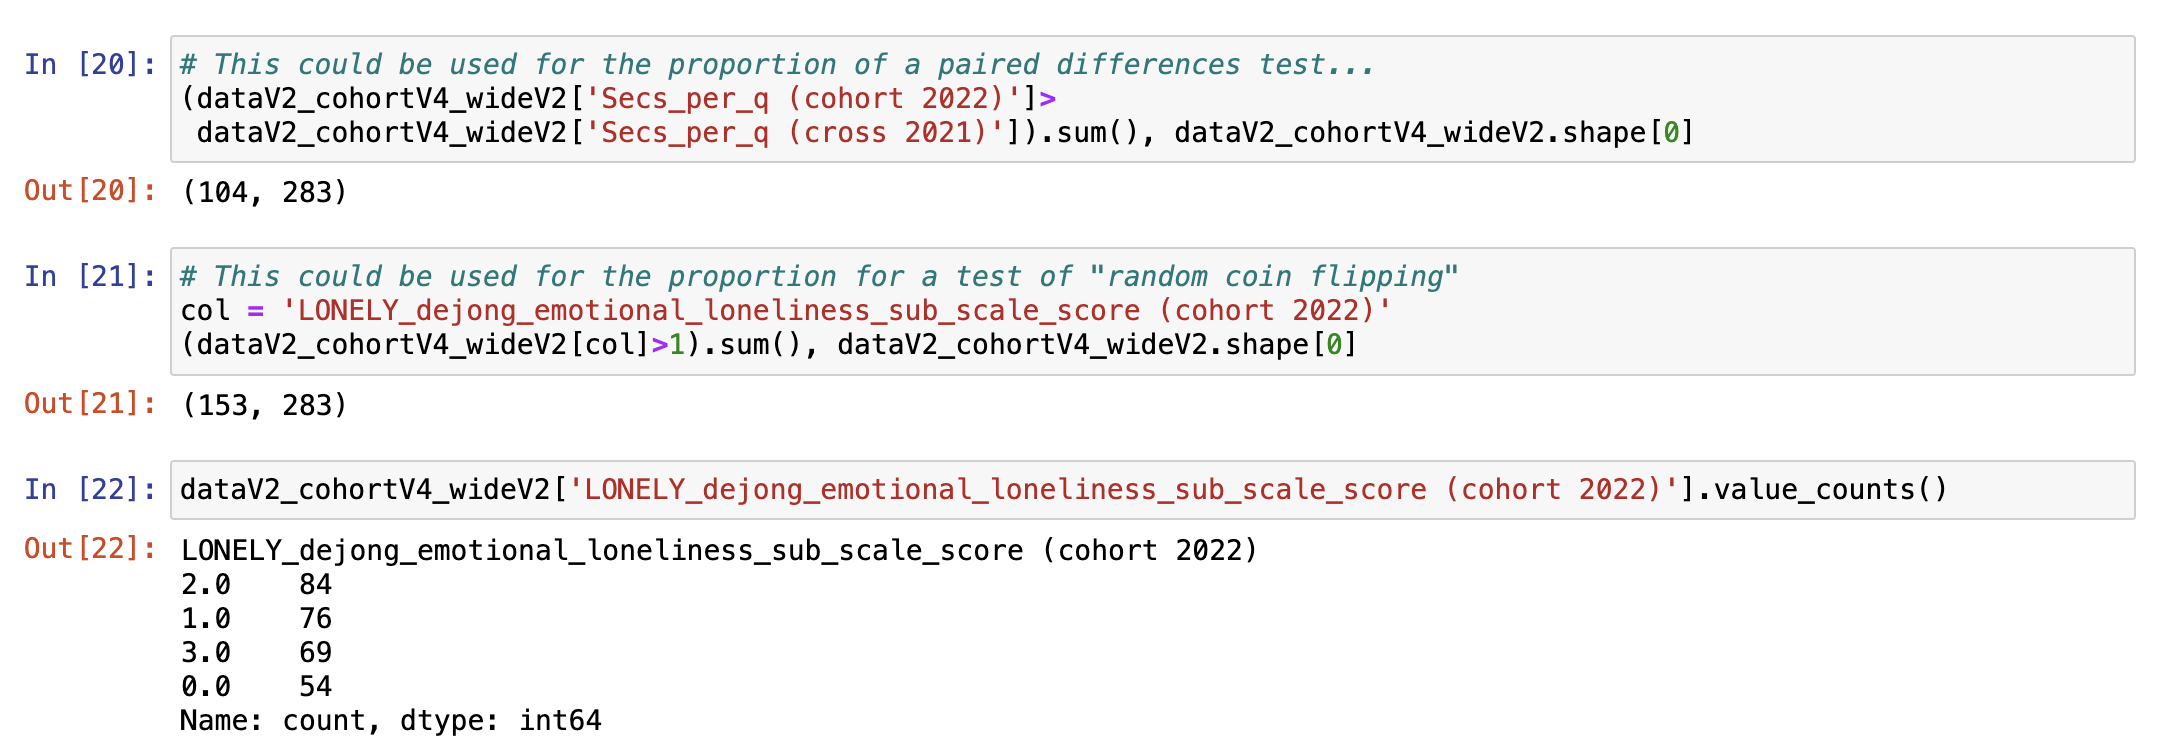